Original Data [1, 2, 2, 3] [1, 1, 2, 2]


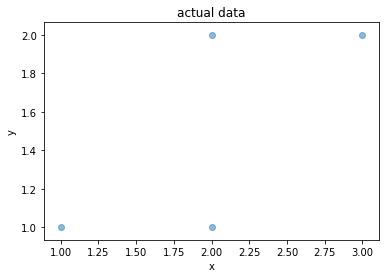

Mean of x 2.0
Mean of Y 1.5
X Transpose [[-1.0, 0.0, 0.0, 1.0], [-0.5, -0.5, 0.5, 0.5]]
X*XT --> [[1.25, 0.25, -0.25, -1.25], [0.25, 0.25, -0.25, -0.25], [-0.25, -0.25, 0.25, 0.25], [-1.25, -0.25, 0.25, 1.25]]
Mean Subtractesd data [-1.0, 0.0, 0.0, 1.0] [-0.5, -0.5, 0.5, 0.5]


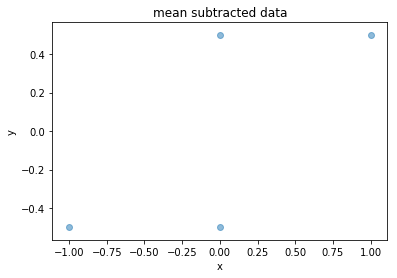

Original matrix:
a
 [[ 1.25  0.25 -0.25 -1.25]
 [ 0.25  0.25 -0.25 -0.25]
 [-0.25 -0.25  0.25  0.25]
 [-1.25 -0.25  0.25  1.25]]
Eigenvalues of the said matrix
[[-0.68819096]
 [-0.16245985]
 [ 0.16245985]
 [ 0.68819096]]
Eigenvectors of the said matrix
2.6180339887498945
mdsproj
[[-1.11351636]
 [-0.26286556]
 [ 0.26286556]
 [ 1.11351636]]
[[-1.11351636]
 [-0.26286556]
 [ 0.26286556]
 [ 1.11351636]]
euc_dis_original

[[0.         1.         1.41421356 2.23606798]
 [1.         0.         1.         1.41421356]
 [1.41421356 1.         0.         1.        ]
 [2.23606798 1.41421356 1.         0.        ]]
euc_dis_mod

[[0.         0.85065081 1.37638192 2.22703273]
 [0.85065081 0.         0.52573111 1.37638192]
 [1.37638192 0.52573111 0.         0.85065081]
 [2.22703273 1.37638192 0.85065081 0.        ]]


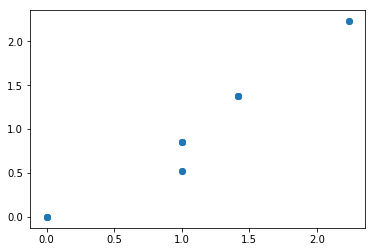

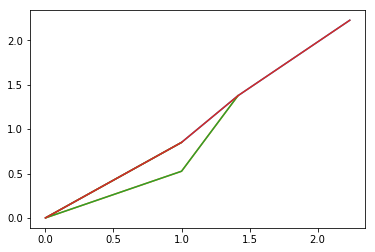

euc_dis_original-euc_dis_mod
[[0.         0.14934919 0.03783164 0.00903525]
 [0.14934919 0.         0.47426889 0.03783164]
 [0.03783164 0.47426889 0.         0.14934919]
 [0.00903525 0.03783164 0.14934919 0.        ]]


In [27]:



"""

16z262
D.S.Venkata Harshith
BE CSE G1
SEM 7
DATA ANALYTICS
TOPIC --> MULTI DIMENSIONAL SCALING

"""
def initialize(rowLen , colLen):
    XT = []
    for i in range(rowLen):
      tempList = [0 for x in range(0,colLen)]
      XT.append(tempList.copy())
    return XT.copy()
  
def transposeMatrix(X):
  #print("X" , X)
  colLen = len(X[0])
  rowLen = len(X)
  XT = initialize(colLen , rowLen)
  #print("XT" , XT)
  for i in range(0,rowLen):
    for j in range(0,colLen):
      XT[j][i] = X[i][j]
  #print("435435345",XT)
  return XT.copy()

def subtract(List,mean):
    for i in range(0,len(List)):
      List.insert(i,List[i]-mean)
      del List[i+1]
    return List
    
  
def meanSubtraction(X):
  zipp = list(zip(*X))
  meanX = sum(zipp[0])/len(zipp[0])
  meanY = sum(zipp[1])/len(zipp[1])
  X = list(zipp[0])
  Y = list(zipp[1])
  del zipp
  meanSubtractedX = subtract(X.copy(),meanX)
  meanSubtractedY = subtract(Y.copy(),meanY)
  return [meanSubtractedX,meanSubtractedY,meanX,meanY]
def createLists(X,Y):
  List = []
  for i in range(0,len(X)):
    temp = [X[i] ,Y[i]]
    List.append(temp)
  return List

def multiply(X, Y):
  #print(X,Y)
  result = initialize(len(X) , len(Y[0]))
  #print(result)
  for i in range(len(X)):
    for j in range(len(Y[0])):
       for k in range(len(Y)):
           result[i][j] += X[i][k] * Y[k][j]
  return result





def plotit(x,y,str1):
  import numpy as np
  import matplotlib.pyplot as plt



  plt.scatter(x,y, alpha=0.5)
  plt.title(str1)
  plt.xlabel('x')
  plt.ylabel('y')
  plt.show()

  

  
  
  
def Eigen(XXT):
  import numpy as np
  m = np.mat(XXT)
  print("Original matrix:")
  print("a\n", m)
  w, v = np.linalg.eig(m) 
  return [w , v]

  
  
  
  
  

P = [[1,1],[2,1],[2,2],[3,2]]  
x,y = [] , []
for i in P:
  x.append(i[0])
  y.append(i[1])
  
print("Original Data" , x,y)

plotit(x,y,"actual data") ###plotting actual data
X_,Y_,meanX,meanY = meanSubtraction(P)
print("Mean of x" , meanX)
print("Mean of Y" , meanY)
P1 = list(zip(X_,Y_))
X = createLists(X_,Y_)
XT = transposeMatrix(X)
print("X Transpose" , XT)
XXT = multiply(X,XT)
print("X*XT -->" , XXT)
print("Mean Subtractesd data" , X_,Y_)
plotit(X_,Y_,"mean subtracted data") #####plotting mean subtracted data
eigenval , eigenvec = Eigen(XXT)
  


evec=eigenvec[:,[0]]
print( "Eigenvalues of the said matrix")
print(evec)


e_val=eigenval[0]
print( "Eigenvectors of the said matrix")
print(e_val)



import math
mdsproj=math.sqrt(e_val)*evec
print("mdsproj")
print(mdsproj)




#import math
mdsproj=math.sqrt(e_val)*evec
print(mdsproj)
  
import numpy as np
X = np.array(P)
import copy
X_m = np.mean(X[:,0])
Y_m = np.mean(X[:,1])

msubX = X[:,0] - X_m

msubY = X[:,1] - Y_m

msubData = np.column_stack((msubX,msubY))


import matplotlib.pyplot as plt

from sklearn.metrics.pairwise import euclidean_distances
euc_dis_original=euclidean_distances(msubData, msubData)
print("euc_dis_original\n")
print(euc_dis_original)



euc_dis_mod=euclidean_distances(mdsproj, mdsproj)
print("euc_dis_mod\n")
print(euc_dis_mod)




plt.scatter(euc_dis_original, euc_dis_mod)
plt.show()


plt.plot(euc_dis_original, euc_dis_mod)
plt.show()


print("euc_dis_original-euc_dis_mod")
print(euc_dis_original-euc_dis_mod)
